<a href="https://colab.research.google.com/github/neethusunil/penguin-classifier/blob/main/Penguin_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer 

In [ ]:
#importing dataset
penguin = pd.read_csv("/content/penguins_lter.csv")
penguin.fillna(0)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,0.00000,0.00000,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,0
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,0
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,0.0,0.0,0.0,0.0,0,0.00000,0.00000,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,0.0,0.0,0.0,0.0,0,0.00000,0.00000,0
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,0
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,0
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,0


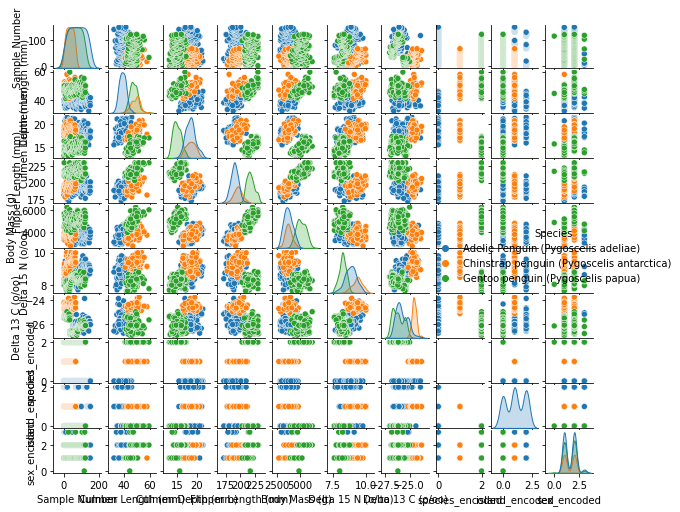

In [ ]:
import seaborn as sns

pairplot_figure = sns.pairplot(penguin, hue="Species")
pairplot_figure.fig.set_size_inches(9, 6.5)

In [ ]:
#Lable Encoder
le = LabelEncoder()
penguin['species_encoded']= le.fit_transform(penguin['Species'])
penguin['island_encoded']= le.fit_transform(penguin['Island'])
penguin['sex_encoded']= le.fit_transform(penguin['Sex'])
print(penguin.head(5))

  studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion  Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3  Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \


In [ ]:
print(penguin.shape)

(344, 17)


In [ ]:
penguin.describe(include='all')

In [ ]:
#covariance
penguin.cov()

In [ ]:
#preprocessing
#spli tour datasets into its attributes and labels
X = penguin.iloc[:,3 :-1].values
y = penguin.iloc[:, 2].values


In [ ]:
X

array([['Anvers', 'Torgersen', 'Adult, 1 Egg Stage', ..., 'MALE', nan,
        nan],
       ['Anvers', 'Torgersen', 'Adult, 1 Egg Stage', ..., 'FEMALE',
        8.94956, -24.69454],
       ['Anvers', 'Torgersen', 'Adult, 1 Egg Stage', ..., 'FEMALE',
        8.36821, -25.33302],
       ...,
       ['Anvers', 'Biscoe', 'Adult, 1 Egg Stage', ..., 'MALE', 8.30166,
        -26.04117],
       ['Anvers', 'Biscoe', 'Adult, 1 Egg Stage', ..., 'FEMALE', 8.24246,
        -26.11969],
       ['Anvers', 'Biscoe', 'Adult, 1 Egg Stage', ..., 'MALE', 8.3639,
        -26.15531]], dtype=object)

In [ ]:
y


array(['Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis

In [ ]:
#split datasets
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state = 44)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


ValueError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
y_pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor'],
      dtype=object)

In [ ]:
x_test

array([[ 1.09056908,  0.52093649,  1.14394405,  1.71929575],
       [-1.15716871,  0.06794824, -1.26838984, -1.4265567 ],
       [-0.15817414, -1.0645224 , -0.11965942, -0.24686203],
       [-0.15817414, -0.15854589,  0.28239623,  0.01529234],
       [ 0.84082043, -0.15854589,  1.20138057,  1.32606419],
       [-1.53179168,  0.29444237, -1.32582636, -1.29547952],
       [ 2.33931229, -1.0645224 ,  1.8331823 ,  1.45714138],
       [ 1.83981501, -0.38504002,  1.48856317,  0.80175545],
       [ 1.59006636, -0.15854589,  1.25881709,  1.19498701],
       [-0.40792278, -1.0645224 ,  0.39726927,  0.01529234],
       [-0.90742007,  0.97392475, -1.32582636, -1.16440233],
       [ 1.34031772,  0.06794824,  0.68445188,  0.40852389],
       [-0.90742007,  1.65340713, -1.21095332, -1.29547952],
       [-0.03329982, -0.83802827,  0.79932492,  0.93283264],
       [-0.78254575,  0.74743062, -1.32582636, -1.29547952],
       [-1.53179168,  0.06794824, -1.26838984, -1.29547952],
       [ 2.21443797, -0.

In [ ]:
y_test

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor'],
      dtype=object)

In [ ]:
#Evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 9  0  0]
 [ 0  9  0]
 [ 0  1 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
#comparing error rate with the k value

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

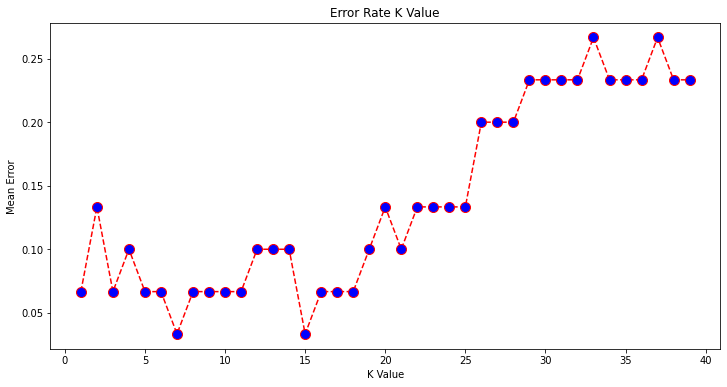

In [ ]:
#The above script executes a loop from 1 to 40. In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.
#The next step is to plot the error values against K values. Execute the following script to create the plot:

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
#prediction of iris
new_data =np.array([-1.656666  , -1.74400478, -1.38326288, -1.16440233]).reshape(-1,4)
new_data

array([[-1.656666  , -1.74400478, -1.38326288, -1.16440233]])

In [ ]:
classifier.predict(new_data)

array(['Iris-setosa'], dtype=object)